# <center> <h1> hyperparameter tuning Random Forest Classifier </h1> </center>

In [1]:
# Import library
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
datos = pd.read_csv("heart.csv")
datos.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


## Duplicate values

In [3]:
datos[datos.duplicated()]
# drop duplicate values 
datos.drop_duplicates(keep='first',inplace=True)

## Scaling data

In [4]:
# copy the data 
df_copy = datos.copy()

from sklearn.preprocessing import MinMaxScaler
#Create objectscaler 
scaler = MinMaxScaler()
# Fit data
df_scaled = scaler.fit_transform(df_copy)
#convert array to data frame
df_scaled  = pd.DataFrame(df_scaled)
# Reset labels to data frame
df_scaled.columns = datos.columns
df_scaled.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0


# Configuracion de variables test y train

In [5]:
# define the variable 'x' and 'y'

X = df_scaled.drop('output', axis=1)
y = df_copy['output']

In [6]:
# Spliting data train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create models

## load models and metrics load models and metrics 

In [7]:
# import classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 

# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

##  hyperparameter tuning

Let's try to get the best parameter for our model 

In [8]:
# Create object model
model = RandomForestClassifier(n_jobs=-1)

#define grid params 
params = {
    'n_estimators': [150],
    'max_features': [5, 7, 9],
    'max_depth'   : [None, 3, 10, 20],
    'criterion'   : ['gini', 'entropy']
}

model = GridSearchCV(RandomForestClassifier(), params, cv = 5, n_jobs= -1)
model.fit(X_train, y_train)

# get beter params
print(f"{model.best_params_}")
print(f"The best score: {model.best_score_}")

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150}
The best score: 0.8467687074829933


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create object model
model = RandomForestClassifier(n_jobs=-1)

# Defines the grid parameters
params = {
    'n_estimators': [150],
    'max_features': [5, 7, 9],
    'max_depth': [None, 3, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Creates GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5, n_jobs=-1)

# Fit the model with training data
grid_search.fit(X_train, y_train)

# get beter params
print(f"{grid_search.best_params_}")
print(f"The best score: {grid_search.best_score_}")

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150}
The best score: 0.8424319727891156


In [10]:
model_final = RandomForestClassifier(n_estimators = grid_search.best_params_['n_estimators'],
                                     max_features = grid_search.best_params_['max_features'],
                                     max_depth = grid_search.best_params_['max_depth'],
                                     criterion = grid_search.best_params_['criterion']
                                     )

model_final.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=9,
                       n_estimators=150)

# Ploting model

In [11]:
from sklearn.tree import export_graphviz
import graphviz

# Select one of the trees in the model (e.g. the first tree).
tree = model_final.estimators_[0]

# Get class names in string format
class_names = [str(c) for c in model_final.classes_]

# Export tree in DOT format
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X.columns,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Creates a graph from the DOT data
graph = graphviz.Source(dot_data)

# Displays the tree graph
graph.render('tree')  # Save the chart to a file
graph.view()  #Show chart


'tree.pdf'

# Importance of features in the classification model

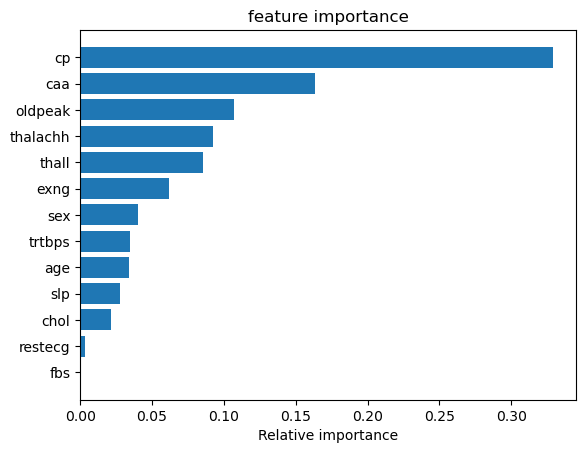

In [12]:
# Plot
feature_importance = model_final.feature_importances_
feature_names = X_train.columns
sorted_idx = feature_importance.argsort()

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Relative importance')
plt.title('feature importance')
plt.show()


In [13]:
# save model

#import pickle
#pickle.dump(model_final, open("Random_forest.pkl", "wb"))